# **Airline Crews:**

Problem Source: F. S. Hillier and G. J. Lieberman, "Introduction to Mathematical Programming," 2nd Edition, McGraw-Hill Inc., New York, 1995.

**Problem Statement:**

An airline needs to assign its crews to cover all its upcoming flights. We will focus on the problem of assigning three crews based in San Francisco (SF) to the flights listed in the first column of Table 12.4. The other 12 columns show the 12 feasible sequences of flights for a crew. (The numbers in each column indicate the order of the flights.) Exactly three of the sequences need to be chosen (one per crew) in such a way that every flight is covered. (It is permissible to have more than one crew on a flight, where the extra crews would fly as passengers, but union contracts require that the extra crews still be paid for their time as if they were working.) The cost of assigning a crew to a particular sequence of flights is given (in thousands of dollars) in the bottom row of the table. The objective is to minimize the total cost of the three crew assignments that cover all the flights.

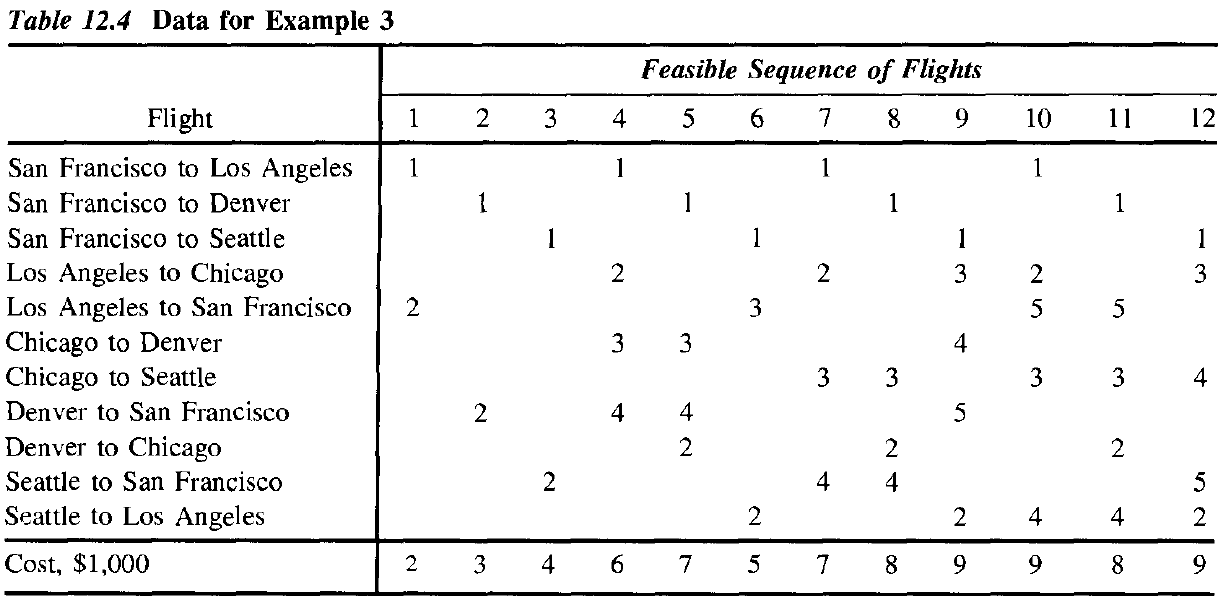

**Modeling:**

$x_{j} \ $   binary variables for sequences

$\\ $

$Objective\ Function:\\ $

$Min\ Z = 2x_{1}+3x_{2}+4x_{3}+6x_{4}+7x_{5}+5x_{6}+7x_{7}+8x_{8}+9x_{9}+9x_{10}+8x_{11}+9x_{12}$

$\\ $

$Constraints:\\ $

$x_{1}+x_{4}+x_{7}+x_{10} \geq 1$

$x_{2}+x_{5}+x_{8}+x_{11} \geq 1$

$x_{3}+x_{6}+x_{9}+x_{12} \geq 1$

$x_{4}+x_{7}+x_{9}+x_{10}+x_{12} \geq 1$

$x_{1}+x_{6}+x_{10}+x_{11} \geq 1$

$x_{4}+x_{5}+x_{9} \geq 1$

$x_{7}+x_{8}+x_{10}+x_{11}+x_{12} \geq 1$

$x_{2}+x_{4}+x_{5}+x_{9} \geq 1$

$x_{5}+x_{8}+x_{11} \geq 1$

$x_{3}+x_{7}+x_{8}+x_{12} \geq 1$

$x_{6}+x_{9}+x_{10}+x_{11}+x_{12} \geq 1$

$x_{1}+x_{2}+...+x_{12} = 3$

## Using Pulp Library

In [1]:
!pip install pulp
from pulp import *
import numpy as np
import pandas as pd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 58.1 MB/s eta 0:00:00


In [8]:
#Defining Variables

x = LpVariable.dicts('x', ((i) for i in list(range(1,13))), lowBound=0, cat='Binary')

In [9]:
#Defining Objective Function

model = LpProblem('model', LpMinimize)

model += 2*x[1]+3*x[2]+4*x[3]+6*x[4]+7*x[5]+5*x[6]+7*x[7]+8*x[8]+9*x[9]+9*x[10]+8*x[11]+9*x[12]

In [10]:
#Constraints

model += x[1]+x[4]+x[7]+x[10] >= 1
model += x[2]+x[5]+x[8]+x[11] >= 1
model += x[3]+x[6]+x[9]+x[12] >= 1
model += x[4]+x[7]+x[9]+x[10]+x[12] >= 1
model += x[1]+x[6]+x[10]+x[1] >= 1
model += x[4]+x[5]+x[9] >= 1
model += x[7]+x[8]+x[10]+x[11]+x[12] >= 1
model += x[2]+x[4]+x[5]+x[9] >= 1
model += x[5]+x[8]+x[11] >= 1
model += x[3]+x[7]+x[8]+x[12] >= 1
model += x[6]+x[9]+x[10]+x[11]+x[12] >= 1
model += lpSum(x) == 3

In [11]:
#Model summary

model

model:
MINIMIZE
2*x_1 + 9*x_10 + 8*x_11 + 9*x_12 + 3*x_2 + 4*x_3 + 6*x_4 + 7*x_5 + 5*x_6 + 7*x_7 + 8*x_8 + 9*x_9 + 0
SUBJECT TO
_C1: x_1 + x_10 + x_4 + x_7 >= 1

_C2: x_11 + x_2 + x_5 + x_8 >= 1

_C3: x_12 + x_3 + x_6 + x_9 >= 1

_C4: x_10 + x_12 + x_4 + x_7 + x_9 >= 1

_C5: 2 x_1 + x_10 + x_6 >= 1

_C6: x_4 + x_5 + x_9 >= 1

_C7: x_10 + x_11 + x_12 + x_7 + x_8 >= 1

_C8: x_2 + x_4 + x_5 + x_9 >= 1

_C9: x_11 + x_5 + x_8 >= 1

_C10: x_12 + x_3 + x_7 + x_8 >= 1

_C11: x_10 + x_11 + x_12 + x_6 + x_9 >= 1

_C12: x_1 + x_10 + x_11 + x_12 + x_2 + x_3 + x_4 + x_5 + x_6 + x_7 + x_8 + x_9
 = 3

VARIABLES
0 <= x_1 <= 1 Integer
0 <= x_10 <= 1 Integer
0 <= x_11 <= 1 Integer
0 <= x_12 <= 1 Integer
0 <= x_2 <= 1 Integer
0 <= x_3 <= 1 Integer
0 <= x_4 <= 1 Integer
0 <= x_5 <= 1 Integer
0 <= x_6 <= 1 Integer
0 <= x_7 <= 1 Integer
0 <= x_8 <= 1 Integer
0 <= x_9 <= 1 Integer

In [12]:
#Solving model

model.solve()
print('Optimal Solution:', pulp.value(model.objective))

Optimal Solution: 18.0


In [13]:
for variables in model.variables():
  print(f'{variables.name}:{variables.varValue}')

x_1:1.0
x_10:0.0
x_11:0.0
x_12:1.0
x_2:0.0
x_3:0.0
x_4:0.0
x_5:1.0
x_6:0.0
x_7:0.0
x_8:0.0
x_9:0.0


In [14]:
VNames = []
for variables in model.variables():
  VNames.append(variables.name)

VValue = []
for variables in model.variables():
  VValue.append(np.round(variables.varValue, 2))

data = {'Variables': VNames, 'Value': VValue}
pd.DataFrame(data, index = range(1, len(VValue)+1))

,Variables,Value
1,x_1,1.0
2,x_10,0.0
3,x_11,0.0
4,x_12,1.0
5,x_2,0.0
6,x_3,0.0
7,x_4,0.0
8,x_5,1.0
9,x_6,0.0
10,x_7,0.0


## Using Pyomo Library

In [15]:
!pip install pyomo
!apt-get install -y -qq glpk-utils

from pyomo.environ import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.3 MB/s eta 0:00:00
Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 123621 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_5.0-1_amd64.deb ...
Unpacking libglpk40:amd64 (5.0-1) ...
Selecting previously unselected package

In [20]:
model = ConcreteModel()

model.indices = Set(initialize=list(range(1,13)))
model.x = Var(model.indices, domain=Binary)

model.obj = Objective(expr=2*model.x[1]+3*model.x[2]+4*model.x[3]+6*model.x[4]+7*model.x[5]+5*model.x[6]+7*model.x[7]+8*model.x[8]+9*model.x[9]+9*model.x[10]+8*model.x[11]+9*model.x[12], sense=minimize)

model.constraint1 = Constraint(expr=model.x[1]+model.x[4]+model.x[7]+model.x[10] >= 1)
model.constraint2 = Constraint(expr=model.x[2]+model.x[5]+model.x[8]+model.x[11] >= 1)
model.constraint3 = Constraint(expr=model.x[3]+model.x[6]+model.x[9]+model.x[12] >= 1)
model.constraint4 = Constraint(expr=model.x[4]+model.x[7]+model.x[9]+model.x[10]+model.x[12] >= 1)
model.constraint5 = Constraint(expr=model.x[1]+model.x[6]+model.x[10]+model.x[1] >= 1)
model.constraint6 = Constraint(expr=model.x[4]+model.x[5]+model.x[9] >= 1)
model.constraint7 = Constraint(expr=model.x[7]+model.x[8]+model.x[10]+model.x[11]+model.x[12] >= 1)
model.constraint8 = Constraint(expr=model.x[2]+model.x[4]+model.x[5]+model.x[9] >= 1)#
model.constraint9 = Constraint(expr=model.x[5]+model.x[8]+model.x[11] >= 1)
model.constraint10 = Constraint(expr=model.x[3]+model.x[7]+model.x[8]+model.x[12] >= 1)
model.constraint11 = Constraint(expr=model.x[6]+model.x[9]+model.x[10]+model.x[11]+model.x[12] >= 1)
model.constraint12 = Constraint(expr=sum(model.x[i] for i in model.indices) == 3)

SolverFactory('glpk').solve(model)

model.display()

Model unknown

  Variables:
    x : Size=12, Index=indices
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          1 :     0 :   1.0 :     1 : False : False : Binary
          2 :     0 :   0.0 :     1 : False : False : Binary
          3 :     0 :   0.0 :     1 : False : False : Binary
          4 :     0 :   0.0 :     1 : False : False : Binary
          5 :     0 :   1.0 :     1 : False : False : Binary
          6 :     0 :   0.0 :     1 : False : False : Binary
          7 :     0 :   0.0 :     1 : False : False : Binary
          8 :     0 :   0.0 :     1 : False : False : Binary
          9 :     0 :   0.0 :     1 : False : False : Binary
         10 :     0 :   0.0 :     1 : False : False : Binary
         11 :     0 :   0.0 :     1 : False : False : Binary
         12 :     0 :   1.0 :     1 : False : False : Binary

  Objectives:
    obj : Size=1, Index=None, Active=True
        Key  : Active : Value
        None :   True :  18.0

  Constraints:
    constraint1

In [21]:
print("Variable values:")
model.x.pprint()

Variable values:
x : Size=12, Index=indices
    Key : Lower : Value : Upper : Fixed : Stale : Domain
      1 :     0 :   1.0 :     1 : False : False : Binary
      2 :     0 :   0.0 :     1 : False : False : Binary
      3 :     0 :   0.0 :     1 : False : False : Binary
      4 :     0 :   0.0 :     1 : False : False : Binary
      5 :     0 :   1.0 :     1 : False : False : Binary
      6 :     0 :   0.0 :     1 : False : False : Binary
      7 :     0 :   0.0 :     1 : False : False : Binary
      8 :     0 :   0.0 :     1 : False : False : Binary
      9 :     0 :   0.0 :     1 : False : False : Binary
     10 :     0 :   0.0 :     1 : False : False : Binary
     11 :     0 :   0.0 :     1 : False : False : Binary
     12 :     0 :   1.0 :     1 : False : False : Binary
